# Implementing Loss Function

### © Jubeen Shah 2018

Hey there! Welcome to `J.S Codes` jupyter notebooks for TensorFlow!
<br>

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
sess=tf.Session()

Loss functions are very important to machine learning algorithms, they calculate the distance between the model outputs and the truth or the actual values. In this notebook we'll see various `loss` function implementation in TensorFlow.

The `loss` function compares the target to the prediction and gives a numerical distance between the two.

To start off, we will create a sequence of our predictions and a target as a tensor, we will output the results across 1000 points between -1 and 1.

In [3]:
x_vals = tf.linspace(start = -1., stop = 1., num = 1000)
target = tf.constant(0.)

 - __L2 Norm Loss__ also known as `Euclidean Loss Function`. It is just the square of the distance to the target. Here, we will compute the `loss` function as if the target is zero. <br>
 ### $ \sum_{i=0}^N {(y_i - h(x_i))^2}$

In [4]:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

 - __L1 Norm Loss__ also known as the `Absolute Loss Function`. In this, instead of squaring the differnce we take the absolute value. The `L1 Norm Loss` function is better for __outliers__ than the L2 Norm Function, because it is not as steep for larger values. One issue, with the L1 Norm Loss function is that, its curve isn't smooth, which mugh result in algorithms not converging well.
 
 ### $ \sum_{i=0}^N |y_i - h(x_i)|$

In [5]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

 - __Pseudo-Huber Loss__ is a continuous and smooth approximation to the `Huber Loss Function`. This loss function attepts to take the best of L1 and L2 norms by being convex near the target and less steep for the extreme values. The form depends on the extra parameter, `delta` which dictates how steep it will be. We'll eventually see the graphs for all of these loss functions, later in this notebook.
 ### $ L_\delta(a) =  \delta^2 (\sqrt {1 + (\frac{a}{\delta})^2} - 1)$

In [6]:
delta1 = tf.constant(0.25)
huber_y_vals_1 = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals) / delta1)) - 1.)
huber_y_out_1 = sess.run(huber_y_vals_1)

In [7]:
delta2 = tf.constant(5.)
huber_y_vals_2 = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals) / delta1)) - 1.)
huber_y_out_2 = sess.run(huber_y_vals_2)

There are also classification `loss` function that can be used to predict categorical outcomes. To do that let us create one more variable with `l_vals` with target as a constant.

In [8]:
l_vals = tf.linspace(-3., 5., 500) #x_vals
m_target = tf.constant(1.) #target
m_targets = tf.fill([500], 1.) #targets

`Hinge Loss` is mostly used for Support Vector Machines, but can be used even for Neural Networks as well. It is meant to compute the loss between two target classes, `1`and `-1`. You can learn more about [Hinge Loss](https://en.wikipedia.org/wiki/Hinge_loss) if you wish to. The mathematical formula for the function is as follows

$ \ell(y) = \max(0, 1 - (t \bullet y) )$

In [11]:
hinge_y_vals = tf.maximum(0., tf.subtract(1., tf.multiply(m_target, l_vals)))
hinge_y_out = sess.run(hinge_y_vals)

[`Cross Entropy`](https://en.wikipedia.org/wiki/Cross_entropy) for a binart case is sometimes also referred to as `logistic loss function`. It comes about when we are predicting the two classes `0` or `1`. We wish to measure a distance from the actual class `(0 or 1)` to the predicted value, which usually is a real number between 0 and 1. The mathematical representation of cross entropy is as follows. 

$ H (p,q) = -\sum_x p(x) \log q(x) = - ylog \hat{y} - (1 - y) log(1 - \hat{y}) $

In [12]:
cross_entropy_y_vals = - tf.multiply(m_target, tf.log(l_vals)) -tf.multiply((1. - m_target), tf.log(1. - l_vals))
cross_entropy_y_out = sess.run(cross_entropy_y_vals)

[`Sigmoid Cross Entropy Loss`](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits) is very similar to the previous loss function, except that we transform the x-values by the sigmoid function __before__ we put them in the cross entropy loss.

In [17]:
sigmoid_cross_entropy_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels=m_targets, logits=l_vals)
sigmoid_cross_entropy_y_out  = sess.run(sigmoid_cross_entropy_y_vals)

`Weighted Cross Entropy` is a weighted version of the sigmoid cross entropy loss. We provide a weight on the positive target. 

In [18]:
weight = tf.constant(0.5)
weighted_cross_entropy_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=l_vals, pos_weight=weight, targets=m_targets)
weighted_cross_entropy_y_out = sess.run(weighted_cross_entropy_y_vals)

`Softmax Cross Entropy` loss operates on non-normalized outputs. This function is used to measure a loss when there is only one target category instead of multiple. Because of this, the function transforms the ourputs into a probabilit distribution via the `softmax function` and then computes the loss function from a true probability distribution, as follows.

In [20]:
unscaled_logits = tf.constant([[1.,-3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_cross_entropy_y_vals = tf.nn.softmax_cross_entropy_with_logits_v2(logits= unscaled_logits, labels=target_dist)
print(sess.run(softmax_cross_entropy_y_vals))

[1.1601256]


## Plotting the loss functions

Let's now use the matplotlib library to plot the values calculated above and compare them.

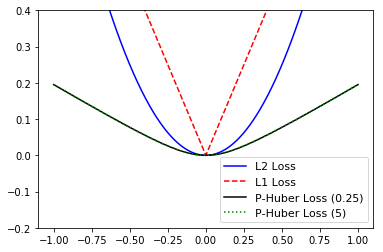

In [23]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label = 'L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label = 'L1 Loss')
plt.plot(x_array, huber_y_out_1, 'k-', label = 'P-Huber Loss (0.25)')
plt.plot(x_array, huber_y_out_2, 'g:', label = 'P-Huber Loss (5)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size' : 11})
plt.show()

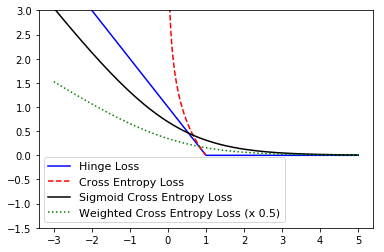

In [25]:
l_array = sess.run(l_vals)
plt.plot(l_array, hinge_y_out, 'b-', label = 'Hinge Loss')
plt.plot(l_array, cross_entropy_y_out, 'r--', label = 'Cross Entropy Loss')
plt.plot(l_array, sigmoid_cross_entropy_y_out, 'k-', label = 'Sigmoid Cross Entropy Loss')
plt.plot(l_array, weighted_cross_entropy_y_out, 'g:', label = 'Weighted Cross Entropy Loss (x 0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower left', prop={'size' : 11})
plt.show()